<a href="https://colab.research.google.com/github/AshishCJha/Sentiment-Analysis/blob/master/Tweeter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import tweepy as tw
import itertools
import collections
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt
import re


In [0]:
consumer_key =  '5s30uper0Oz5UJ151PP95gUbK'
consumer_secret = '9dPw5TPuzsiAWk4x0gqGxZyeJtOgvDxmBAodkvBBPL8BIKcP7D'
access_token = '2467536254-VMsdfrHTBzydlcPYspksOcGtRItjMC64twbWizc'
access_token_secret = 'ixD37uxnWj95nZ5aU62nUsawjc7Nml24PEjNU2a0MhFAt'

In [0]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit = True)

In [0]:
public_tweets = api.home_timeline()
for tweet in public_tweets:
  print(tweet.text)

SuperStar Bhaiya @AmitV_Deshmukh 👏👏👏 https://t.co/hOYJLb6axn
हिंदी दिवस पर आप सभी को बहुत-बहुत बधाई। भाषा की सरलता, सहजता और शालीनता अभिव्यक्ति को सार्थकता प्रदान करती है। हिं… https://t.co/FcVmkaZw89
Inviting Technologists and specially Young Innovators and Researchers https://t.co/MOaQF3YYF0
Tesla commercial solar ordering now live at https://t.co/sCkn87vMa9!
Only few days left to close this course. 

If you are a professional or faculty, this course is almost free for you… https://t.co/alnjqoic9D
This is a hard strategic analytics balance: Solve for today, the anticipated future, or the new unfamiliar but like… https://t.co/tTGxhZxkr7
RT @DCPSEBCP: Conducted meeting with the residents of Venkatapura within Madiwala station limits. Heard their complaints. Had a healthy dia…
On his Jayanti, I bow to the venerable Sree Narayana Guru. His rich thoughts, noble ideals and emphasis on social h… https://t.co/IREeJcva9u
RT @vvpuramtrfps: ಸಂಚಾರ ನಿಯಮಗಳನ್ನು ಪಾಲಿಸಿ, ಹಣ ಉಳಿಸಿ.
AVOID TRAFFIC VIOLA

In [0]:
user = api.get_user('@AshishCJha')
print('User Screen Name')
print(user.screen_name)
print(user.followers_count)

User Screen Name
AshishCJha
93


In [0]:
for friend in user.friends():
  print(friend.screen_name)

sundarpichai
satyanadella
elonmusk
ramavshree
sandeepgiri
gpingali
madhumitaphukan
pradmishra1
TaramsTech
Ashu879299
Priyank00891210
AmritSh65258967
sumeet8690
vidya_sagar_CH
DCPCentralBCP
goyal_abhei
BlrCityPolice
Nandinijaiswa20
CreativityEnhan
akshaymishra14


In [0]:
for followers in user.followers():
  print(followers.screen_name)

pradmishra1
madhumitaphukan
SahuSomeshsahu
sachidanandjh14
Husenbadshah
SatpalR80390544
PoonamK66308920
Chandan67680040
Shankar48246985
Roshni8191
Ravi96084581
NavyaSh79631629
SANJU67283222
Prakash64352263
MadhuBhelley
arpitsamar
Singh_ankyy
RupeshS29096452
RahulKu19941780
Priyank00891210


In [0]:
api.update_status('Sample tweet using #Python and #Tweepy packages')

Status(_api=<tweepy.api.API object at 0x7fe759d3cda0>, _json={'created_at': 'Sat Sep 14 05:31:48 +0000 2019', 'id': 1172744734974062597, 'id_str': '1172744734974062597', 'text': 'Sample tweet using #Python and #Tweepy packages', 'truncated': False, 'entities': {'hashtags': [{'text': 'Python', 'indices': [19, 26]}, {'text': 'Tweepy', 'indices': [31, 38]}], 'symbols': [], 'user_mentions': [], 'urls': []}, 'source': '<a href="https://github.com/AshishCJha" rel="nofollow">ashishchandrajhatweets</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 2467536254, 'id_str': '2467536254', 'name': 'Ashish', 'screen_name': 'AshishCJha', 'location': 'Bengaluru, India', 'description': 'AI Vision | Poetic Thought | Yogi', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 93, 'friends_count': 59, 'listed_count': 4, 'created_at': 'M

In [0]:
tweets = tw.Cursor(api.search, q='@isro-filter:retweets', lang = 'en', since = '2019-04-01').items(100)

In [0]:
tweets_text = [tweet.text for tweet in tweets]
tweets_text

['@DhiraJThakrE12 @Hindusthaani1 @Astro_Neel @isro @chandrayan2 U r absolutely right and even indeed!!!..... But paki… https://t.co/arjfoWlcgm',
 '@Kishor_a @isro @GauravModiBhakt @nishants79 @Ramesh_BJP @AkshayBhade5 @AdvNileshSharma @VidarbhaPutra… https://t.co/SzIG1Dl01Y',
 '@isro Weldon  i am proud of isro',
 '@DrKumarVishwas @PMOIndia @isro @narendramodi Very nice sir',
 'Special pics for people teaching science to @isro &amp; comparing them with NASA. \n\nHere is what NASA does before sendi… https://t.co/gEh6gXKN8j',
 'Got my boarding pass for #Mars2020 from @NASA\n\nNASA will send my name to Mars.\n@isro @NASA https://t.co/YAJX69IN6k',
 '@M19Sen @BlackBallBoy1 @holatombola @isro Sanskrit is foreign language , are you serious ?',
 '@isro make most of your efforts on today &amp; tomorrow, as highest chances of contact with #Vikram exist on these days… https://t.co/5661r7I6T6',
 '@isro @NASA @PMOIndia @narendramodi @AskAnshul @goldstone Now goldstone antena is trying to establish n

In [0]:
len(tweets_text)

100

In [0]:
# Pull a perticular tweet
print(tweets_text[0])
print(tweets_text[7])

@DhiraJThakrE12 @Hindusthaani1 @Astro_Neel @isro @chandrayan2 U r absolutely right and even indeed!!!..... But paki… https://t.co/arjfoWlcgm
@isro make most of your efforts on today &amp; tomorrow, as highest chances of contact with #Vikram exist on these days… https://t.co/5661r7I6T6


In [0]:
# Pull tweets by search words
tweets = tw.Cursor(api.search, q='hdfc card offers-filter:retweets',lang = 'en', since = '2019-04-01').items(100)
tweets_text = [tweet.text for tweet in tweets]
tweets_text

['@talktodebu Hi, we wish to inform that, HDFC Bank offers several promotional offers such as Smart EMI, Insta Jumbo… https://t.co/aj2rGRR0ru',
 'Launch offers include no-cost EMIs up to 12 months. HDFC Bank Credit and Debit card users can avail offers up to Rs… https://t.co/5VtRNZ3Kvh',
 '@HDFC_Bank i am using Hdfc credit card, i applied for this card 3 yrs back till now there is no such offers provide… https://t.co/Es7yVF7fmz',
 '@Flipkart Why axis bank? How many people have axix card? At least hdfc or sbi or even icici debit card..y icici cre… https://t.co/ZyPrz1hDxT',
 'BookMyShow : Get 15% discount up to INR 100 for Movies and Non-Movies\n\nThis offer can be availed twice a month\xa0and… https://t.co/5pu82Nx8C9',
 "A new website, a new app, more offers for credit card holders...what's happening at HDFC Bank? Too much competition?",
 '@Flipkart @flipkartsupport \n#TheBigBillionDays Sale \nWhy not ICICI @ICICIBank  Debit card are coming under this off… https://t.co/PIq6BNXlH0',
 'HD

In [0]:
# Pull tweets by hashtags
tweets = tw.Cursor(api.search, q='#miband4-filter:retweets',lang = 'en', since = '2019-04-01').items(100)
tweets_text = [tweet.text for tweet in tweets]
tweets_text

['Is it a yes or no for the #MiBand4? Know now!\n\n#DCTech\nhttps://t.co/1PLfhwYV1U',
 '#miband4 when is going to lunch',
 '@BrochureLive Retweet Done ☑️\n#ContestAlert\n#Winners #win #AmazonGiftCard #MiBand4 #mifan #xiaomiindia #Xiaomi… https://t.co/cMRwqvCLGo',
 '#Xiaomi #MiBand4: 10 reasons why Mi Band 4 seems like a great upgrade over Mi Band 3 https://t.co/zflvrslv6f… https://t.co/Rw4eZHDYg1',
 '@BrochureLive Retweet done ✅✅\n\n#ContestAlert #Winners #win #AmazonGiftCard #MiBand4 #mifan #xiaomiindia #Xiaomi… https://t.co/NpkJ5EdFQ8',
 'Mi Band 4 India: Expected price, specifications and all you need to know \n#MiBand4\nhttps://t.co/ANz6KWmUOS',
 'Watch the latest video, enter the giveaway to win #MiBand4 https://t.co/aIotFdAuSj 💥💥💥✌️ https://t.co/jI7a6VTLHE',
 'Huami and Mi are among the most popular wearable brands that never fail to fascinate users with attractive features… https://t.co/YTRYOirdwN',
 "My 11 yrs Son wanna fitness band and he saw many videos but finalised @XiaomiI

In [0]:
# Assignment

In [0]:
# Pull tweets containing both “watching” and “now”
tweets = tw.Cursor(api.search, q='watching now-filter:retweets',lang = 'en', since = '2019-04-01').items(10)
tweets_text = [tweet.text for tweet in tweets]
tweets_text

['They can no longer be trusted to report the news.  The rags they print are a waste of paper and the TV and radio as… https://t.co/prcDLePlVF',
 'Don’t know why I ever stopped watching #SnowFallFX. Story really starts to pick up when they introduce crack. Im hooked now.',
 '@nin_kyou *Higashi was busy drying his fluffy hair with the towel, he looks a tad bit better now that he showered..… https://t.co/OTRO6aQNSV',
 'Lol @hulu  been watching the same TV show for the last 6 hours and now all of a sudden its "not included in my subs… https://t.co/b06cOnSOaq',
 "Well, shit. I started watching #unbelievablenetflix and now I can't stop and it's 1:30. Gonna be a late night.",
 'Now watching pyar=dosti',
 'Watching this right now and remembering when I was assaulted. #unbelievablenetflix',
 "Stg I started watching snowfall season 3 episode 1... now I'm tryna watch season 1 and 2 😂",
 'It’s gonna be nice when I’m in my 60s watching all y’all die from your organs failing due to all that alcohol

In [0]:
# Pull tweets containing “flight” and with a negative attitude
tweets = tw.Cursor(api.search, q='flight :( -filter:retweets',lang = 'en', since = '2019-04-01').items(10)
tweets_text = [tweet.text for tweet in tweets]
tweets_text

['OMG CHANYEOLIE PLEASE REST :((. HAVE A SAFE FLIGHT \n#EXO @weareoneEXO https://t.co/HDyOeDB35m',
 'I gotta flight to catch at 6 :(((',
 '.@AmericanAir My birthday trip was almost ruined due to a delay flight. I was downgraded on my new flight :(',
 "@love_seok its only an hours flight away from me I'm devastated :((((((((",
 'i guess the boys will be working during chuseok holidays :-( have a safe flight, baby! https://t.co/jm14tM9oGi',
 '@gsnedders Ugh :(\n\nhave a nice flight too! :)',
 'flight againn :((( keep safe loveee https://t.co/yp05uhugzp',
 '@JetBlue got second degree burn from the hot towels you handed out :( if flight attendants need prongs to hand out,… https://t.co/EfuPbceK2h',
 '@daddehtooru God I wish :( no, it’s partial flight payment, $$$ for japan and my money for rent and stuff the next two weeks',
 '@airvistara First time and hopefully last time disappointed in you. For UK 731 flight , half an hour late departure… https://t.co/jdnlns0Yb0']

In [0]:
# Methods for Followers
api.create_friendship("realpython")

User(_api=<tweepy.api.API object at 0x7fe759d3cda0>, _json={'id': 745911914, 'id_str': '745911914', 'name': 'Real Python', 'screen_name': 'realpython', 'location': '', 'description': 'Python developer resources: #Python tutorials, video courses, sample projects, news, and more!', 'url': 'https://t.co/TyrG6KBLOG', 'entities': {'url': {'urls': [{'url': 'https://t.co/TyrG6KBLOG', 'expanded_url': 'http://realpython.com', 'display_url': 'realpython.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 53647, 'friends_count': 118, 'listed_count': 1766, 'created_at': 'Wed Aug 08 20:44:42 +0000 2012', 'favourites_count': 50129, 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'verified': False, 'statuses_count': 36115, 'lang': None, 'status': {'created_at': 'Sat Sep 14 03:00:08 +0000 2019', 'id': 1172706568682561536, 'id_str': '1172706568682561536', 'text': 'Tracking Progress in Natural Language Processing #python https://t.co/uVzNCYqLqp'

In [0]:
# Methods to update Your profile
api.update_profile(description="AI Vision | Poetic Thought | Yogi")

User(_api=<tweepy.api.API object at 0x7fe759d3cda0>, _json={'id': 2467536254, 'id_str': '2467536254', 'name': 'Ashish', 'screen_name': 'AshishCJha', 'location': 'Bengaluru, India', 'profile_location': {'id': '1b8680cd52a711cb', 'url': 'https://api.twitter.com/1.1/geo/id/1b8680cd52a711cb.json', 'place_type': 'unknown', 'name': 'Bengaluru, India', 'full_name': 'Bengaluru, India', 'country_code': '', 'country': '', 'contained_within': [], 'bounding_box': None, 'attributes': {}}, 'description': 'AI Vision | Poetic Thought | Yogi', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 93, 'friends_count': 60, 'listed_count': 4, 'created_at': 'Mon Apr 28 10:22:00 +0000 2014', 'favourites_count': 52, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': False, 'statuses_count': 188, 'lang': None, 'status': {'created_at': 'Sat Sep 14 05:31:48 +0000 2019', 'id': 1172744734974062597, 'id_str': '1172744734974062597', 'text': 'Sample tweet

In [0]:
# Method for user timeline
#These methods deal with reading tweets, mentions, and retweets from your timeline or any other user’s timeline, as long as it’s public.
timeline = api.home_timeline()
for tweet in timeline:
    print(f"{tweet.user.name} said {tweet.text}")

Narendra Modi said There would also be an e-auction of the gifts and mementos. The proceeds from the auction will be devoted towards t… https://t.co/ioYm3fzqpe
Narendra Modi said Continuing a practice I have always believed in! 

All those gifts and mementos I have received in the last one yea… https://t.co/lgW1xmyVl6
Madhumita Phukan said RT @singh_mandavi: Beautiful way to end the session Nasreen.....Once an IBMer...always an IBMer! #SheLeadswithIBM @Cheeyanna @sandeep_2u @r…
Ben Landis said For example, we can elevate people doing gun ownership the right way.

If you go through this training, and pass al… https://t.co/vF94RZQ8xG
Ben Landis said Idea: it will be easier to pass new federal gun legislation if we can find a way of giving something to gun owners… https://t.co/Pc7TMauN0y
Ashish said Sample tweet using #Python and #Tweepy packages
Genelia Deshmukh said SuperStar Bhaiya @AmitV_Deshmukh 👏👏👏 https://t.co/hOYJLb6axn
Narendra Modi said हिंदी दिवस पर आप सभी को बहुत-बहुत बधाई। भा

In [0]:
# Methods for Likes
# Using these API methods, you can mark any tweet as Liked or remove the Like mark if it was already added.
tweets = api.home_timeline(count=1)
tweet = tweets[0]
print(f"Liking tweet {tweet.id} of {tweet.author.name}")
api.create_favorite(tweet.id)

Liking tweet 1172759282187681792 of Narendra Modi


Status(_api=<tweepy.api.API object at 0x7fe759d3cda0>, _json={'created_at': 'Sat Sep 14 06:29:36 +0000 2019', 'id': 1172759282187681792, 'id_str': '1172759282187681792', 'text': 'There would also be an e-auction of the gifts and mementos. The proceeds from the auction will be devoted towards t… https://t.co/ioYm3fzqpe', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/ioYm3fzqpe', 'expanded_url': 'https://twitter.com/i/web/status/1172759282187681792', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'in_reply_to_status_id': 1172759206740549632, 'in_reply_to_status_id_str': '1172759206740549632', 'in_reply_to_user_id': 18839785, 'in_reply_to_user_id_str': '18839785', 'in_reply_to_screen_name': 'narendramodi', 'user': {'id': 18839785, 'id_str': '18839785', 'name': 'Narendra Modi', 'screen_name': 'narendram

In [0]:
# Pull tweets containing “politics” with Tweets marked as potentially sensitive removed
tweets = tw.Cursor(api.search, q= 'politics filter:safe' ,lang = 'en', since = '2019-04-01').items(10)
tweets_text = [tweet.text for tweet in tweets]
tweets_text

['RT @CBartlett1963: Interior Department says it will temporarily block Democratic aides from official oversight trips - CNNPolitics https://…',
 'RT @juliehinukeu: Cameron accuses Johnson and Gove of behaving appallingly over Brexit https://t.co/Sc9KixgDhZ',
 'RT @PennyMidasRollo: #quote"Britain to bypass Brussels..with mini deals with nations"\nMy guess is they\'ll bundle all those side agreements…',
 'RT @TylerDurden_: This is how Constructive Criticism should be\n\nThis is how Opposition party should expose the failures and Question govern…',
 'RT @TylerDurden_: This is how Constructive Criticism should be\n\nThis is how Opposition party should expose the failures and Question govern…',
 '@MichaelHalila ££££ buys appearances...he will never give up the BP...and he basically gets a free ride in intervie… https://t.co/uMl34EvnHy',
 'RT @joswinson: At the next election, people are going to tell you your only choice is between Boris Johnson or Jeremy Corbyn. It isn’t. The…',
 'RT @CNN:

In [0]:
# Pull tweets containing “puppy” and a Vine
tweets = tw.Cursor(api.search, q= 'puppy filter:vine' ,lang = 'en', since = '2019-04-01').items(10)
tweets_text = [tweet.text for tweet in tweets]
tweets_text

['Teaching a puppy to catch https://t.co/8BadhfJc1k',
 'RT @veryimportant: “in the air tonight” puppy vine https://t.co/EquW85iPZs',
 'RT @veryimportant: “in the air tonight” puppy vine https://t.co/EquW85iPZs',
 '“in the air tonight” puppy vine https://t.co/EquW85iPZs',
 'Teaching a puppy to catch https://t.co/eRR7uyKRWv',
 'Teaching a puppy to catch https://t.co/8BadhfJc1k',
 'RT @lowkeylean2: 94: guard dog to puppy in .3 seconds \n https://t.co/n1SjxkMSki',
 'RT @lowkeylean2: 94: guard dog to puppy in .3 seconds \n https://t.co/n1SjxkMSki',
 'RT @LiveYourNow: Those ears!!\n\nNow of puppy cute!!\n\nhttps://t.co/DaDm5E12tr',
 'RT @thepainterflynn: Puppy caught eating paper decides killing witness is the only way out. https://t.co/IZjEBkodMm']

In [0]:
# Pull tweets containing “traffic” and asking a question
tweets = tw.Cursor(api.search, q= 'traffic ?' ,lang = 'en', since = '2019-04-01').items(10)
tweets_text = [tweet.text for tweet in tweets]
tweets_text

['RT @martr101: brilliant spot to build at least 2500 homes then. Maybe @MarvinJRees should come clean and tell us that it will need a downst…',
 'RT @PeterNicoll7: @Kirstene4Angus @ScotTories It is absolutely tragic that so many innocent lives are lost on our roads each year through d…',
 'RT @sotee_D: How are entrepreneurs meant to survive in this country?? If to do a sponsored add on social media APCON wants to charge 25k to…',
 'RT @Vinay_Mukhi: @ghaziabadpolice Is there any lok adalat for settling of traffic challans like it is there on coming Saturday in Delhi?',
 'RT @AdDikshit: in 5 days this is the violation despite people knowing fully well what is an offence and that fines have been increased. Is…',
 "RT @Symply_Tacha: Queen Tacha talking about Tundeednut bad mouthing her. She doesn't care about all that. For her nothing like bad publicit…",
 '@Priest @natebrooks23 YMMV, but I reckon not crashing into people is a good enough reason. :) More seriously, that’… https://t.co/7tt

In [0]:
# Location and descripton of followers
user = api.get_user("AshishCJha")
print("Last 20 Followers:")
for follower in user.followers():
    print(follower.name)
    print(follower.description)
    print(follower.location)

Last 20 Followers:
Pradeepta Mishra
Dad | Director of AI | #AIArchitect | #Author | Guest Faculty | TEDx Speaker | #ML #DL #Trainer | Inventor at Lymbyc
Bangalore, India
Madhumita Phukan
Brand & Communications @IBM by Profession! A #SocialMedia fanatic, #foodie, #naturelover, a lovely mom n a #Blogger by Passion! N Yes!Views & Tweets are my own.
Bangalore
Somesh

Bengaluru, Karnataka
sachidanand jha


Husenbadshah
Iam a Software Developer
Pune, Maharashtra
Satpal Rawat


Poonam Kumari

Bengaluru South, India
Chandan


Shankar Anand


Roshni
Music Entertainment News Lifestyle Food Fashion Comedy and Humour
Ahmadabad City, India
Ravi


Navya Shree


SANJU


Prakash
I love to new friends from all over the world
कुलाबा, मुंबई
Madhu Bhelley


arpit

Udaipur, India
Ankita Singh


Rupesh Sharma


Rahul Kumar Singh


Priyanka
Lifestyle
B


In [0]:
# Method for trends
trends_result = api.trends_place(1)
for trend in trends_result[0]["trends"]:
    print(trend["name"])

#deprem
#हिंदी_दिवस
#بقيق
#StopHindiImposition
#夜の営みを四文字で表すと
A-10
Jessica Nkosi
Çankırı
ラブライブフェス
レンジャーBOOK
BB弾2000発
スパショ
吉P散歩
メーテラ
#ABSCBNBall2019
#推しのお願い
#TNTUltimateResbakers
#HollywoodMoviesHindiName
#SetorFoto
#異性を好きになる基準
#IndonesiaDaruratAsap
#alexdesouza
#ArlojiMall
#WelcomeJINHYUKtoThailand
#SaturdayThoughts
#あにハニイベント
#صباحات_الهلال
#FullMoonFridaythe13th
#SexSoBadThat
#트친님들_저는_어떤_타입
#JaNawoMePepe
#لزلز
#BeşiktaşınMaçıVar
#WhatWomenDontKnowAboutMen
#HatersGotNothingMV1M
#aniaca
#ห้องพักผู้ป่วย702xSUTH
#MaineIPWFBSNationwide
#MalamMingguanModal100rb
#REIDyfornova5TPH
#LISA25MPARTY
#โยมเป็นผู้หญิงหรือผู้ชาย
#NOX殺_診断
#あなたの性格を三文字で表す
#DrQadriGreatReformer
#福のラジオ
#lonte
#14settembre
#SabadoDetremuraSDV
#CMUTrekking2019


In [0]:
# Find users and location info
tweets = tw.Cursor(api.search, q = "#iphone-filter:retweets", lang = 'en', since = '2019-04-01').items(100)
users = [[tweet.user.screen_name,tweet.user.location] for tweet in tweets]
users
location = pd.DataFrame(data=users, columns=['Screen_Name', 'Location'])
location

,Screen_Name,Location
0,alien_touch,France
1,GBMEdu,Manchester
2,whitestone_UK,
3,CeotechI,
4,itsmejodavis,
5,jirotomoton,
6,ausgmv,
7,zebronics,India
8,JessMcKenna1997,Find a new Apple Watch strap below...
9,bondswell_com,IG/Vine/Tumblr: bondswell


In [0]:
# Let's begin with NLP related activities on 1000 tweets
tweets = tw.Cursor(api.search, q = "indian economy-filter:retweets", lang = 'en', since = '2019-04-01').items(100)
tweets_text = [tweet.text for tweet in tweets]

In [0]:
len(tweets_text)
tweets_text[0:5]

['If the Indian economy continues to lose momentum over the next two quarters, then the country will be falling into… https://t.co/tPuhgXRad3',
 '@VinayDokania Hope this is his new job role to upbeat the Indian economy which is into its destructive mode. Now do… https://t.co/wiPaWnuhd1',
 'They Cant Controll GDP fall,\nIndian Rupee Value Fall,\nAuto Industry slow down,\nEconomy Slow down\n\nLooting Banks, RB… https://t.co/svmWUHdb7V',
 'Answer to Do you think the Indian economy will beat the Chinese economy in years to come? Why? by Matthew Nghiem https://t.co/f4GuHc8aQC',
 'A debate on what ails the economy should acknowledge the problems of India Inc | The Indian Express… https://t.co/nFrVnhsrAg']

In [0]:
len(tweets_text)

100

In [0]:
corpus = []
import nltk
import re
nltk.download('wordnet')
nltk.download('stopwords')
ps = nltk.stem.PorterStemmer()
stop_words = nltk.corpus.stopwords.words('english')
for i in range(0,100):
  tweets_text_cln = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z\t])|(\w+:\/\/\S+)|[0-9]", ' ', tweets_text[i])
  tweets_text_cln = tweets_text_cln.lower()
  tweets_text_cln = tweets_text_cln.split()
  tweets_text_cln = [x for x in tweets_text_cln if not x in stop_words]
  #stem word to base form
  tweets_text_cln = " ".join(tweets_text_cln)
  #Append to the list to get all tweets in one place
  corpus.append(tweets_text_cln)
  

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
for i in corpus:
  print (i)

indian economy continues lose momentum next two quarters country falling
hope new job role upbeat indian economy destructive mode
cant controll gdp fall indian rupee value fall auto industry slow economy slow looting banks rb
answer think indian economy beat chinese economy years come matthew nghiem
debate ails economy acknowledge problems india inc indian express
hindi rashtra bhasha mr home minister languages lakhs indian pe
comparing indian gdp nations well india th la
distress indian economy becoming visible real every passing day auto dealers
calling one nation one language seems stupid dialects amp official languages country
ind bjp bloody fools stupids cant controll gdp fall indian rupee value fall auto industry
fm press conference live may announce key measures economy catch updates
burning issue economy huge loss jobs across country affects every indian household hea
cintaa demandforindustrystatus mr hemantpandey indian entertainment industry contributes approximately
roses re

In [0]:
# Frequenctly used word and their frequency
bagofwords  = []
for i in range (0,100):
  words = corpus[i].split()
  bagofwords.append(words)

In [0]:
bagofwords[0]

['indian',
 'economy',
 'continues',
 'lose',
 'momentum',
 'next',
 'two',
 'quarters',
 'country',
 'falling']

In [0]:
# Leverage itertools and collection to count frequency
all_words = list(itertools.chain(*bagofwords))
print(all_words[0:10])
print()
print("Most commonly occuring words and frequency\n")
words_freq = collections.Counter(all_words)
words_freq.most_common(20)


['indian', 'economy', 'continues', 'lose', 'momentum', 'next', 'two', 'quarters', 'country', 'falling']

Most commonly occuring words and frequency



[('indian', 74),
 ('economy', 62),
 ('india', 16),
 ('amp', 14),
 ('fall', 8),
 ('one', 7),
 ('growth', 7),
 ('country', 6),
 ('gdp', 6),
 ('hindi', 6),
 ('modi', 6),
 ('backbone', 6),
 ('due', 5),
 ('slowdown', 5),
 ('premium', 5),
 ('poor', 5),
 ('auto', 4),
 ('industry', 4),
 ('mr', 4),
 ('well', 4)]

In [0]:
# Remove words which are used for search queries 
words_to_remove = ['india', 'economy','indian','much', 'amp']
bagofwords_new = [[x for x in word if not x in words_to_remove] for word in bagofwords]

In [0]:
all_words = list(itertools.chain(*bagofwords_new))
print(all_words[0:10])
print()
print("Most commonly occuring words and frequency\n")
words_freq = collections.Counter(all_words)
words_freq.most_common(20)


['continues', 'lose', 'momentum', 'next', 'two', 'quarters', 'country', 'falling', 'hope', 'new']

Most commonly occuring words and frequency



[('fall', 8),
 ('one', 7),
 ('growth', 7),
 ('country', 6),
 ('gdp', 6),
 ('hindi', 6),
 ('modi', 6),
 ('backbone', 6),
 ('due', 5),
 ('slowdown', 5),
 ('premium', 5),
 ('poor', 5),
 ('auto', 4),
 ('industry', 4),
 ('mr', 4),
 ('well', 4),
 ('every', 4),
 ('language', 4),
 ('bjp', 4),
 ('key', 4)]

In [0]:
# Form a dataframe with the 20 most commonaly used words
freq_word_df = pd.DataFrame(words_freq.most_common(20),columns = ['Words','Freq'])
freq_word_df.head()

,Words,Freq
0,fall,8
1,one,7
2,growth,7
3,country,6
4,gdp,6


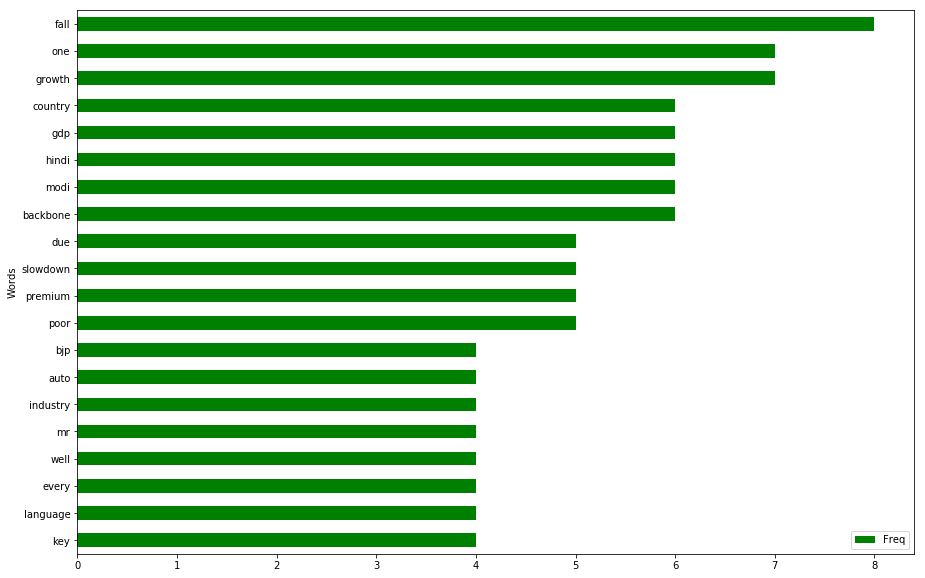

In [0]:
#Plot the most commonaly used words
fig, ax = plt.subplots(figsize=(15,10))
freq_word_df.sort_values(by= 'Freq').plot.barh(x='Words', y='Freq', ax=ax, color = "green")
plt.show()

In [0]:
# Build a wordcloud from the most commonaly used words
from wordcloud import WordCloud, STOPWORDS
word_string = " ".join(freq_word_df.Words)
wordcloud = WordCloud(#stopwords = STOPWORDS, 
    background_color = 'black', max_words = 20).generate(word_string)
    
    

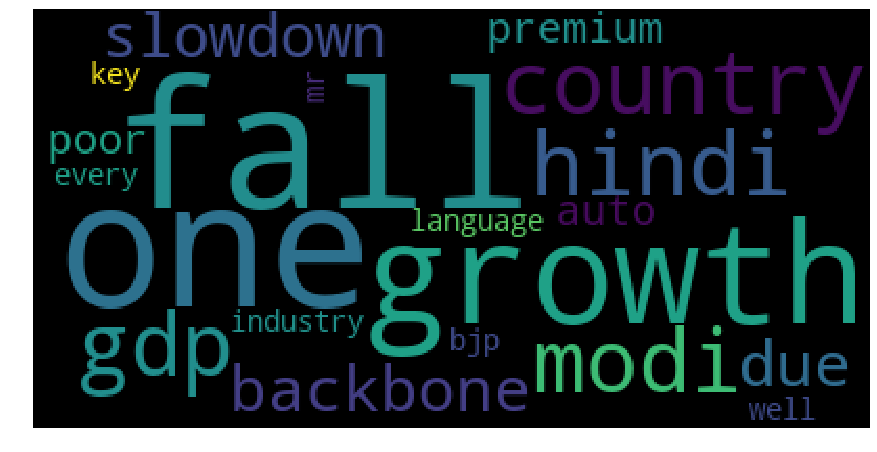

In [0]:
plt.figure(figsize = (15,10))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [0]:
# sentiments of each tween using TextBlob
sentiment_text = [TextBlob(tweet) for tweet in corpus]
print(sentiment_text[1].polarity)
print(sentiment_text[1])

-0.2318181818181818
hope new job role upbeat indian economy destructive mode


In [0]:
sentiments = [[tweet.sentiment.polarity, str(tweet)]for tweet in sentiment_text]
sentiment_df = pd.DataFrame(sentiments, columns=["Polarity", "Tweet_Text"])
sentiment_df.sort_values(by='Polarity', ascending = False)

,Polarity,Tweet_Text
35,1.000000,awesome prof shut mouth know nothing indian ec...
87,0.800000,concentrate indian economy growth development ...
17,0.500000,sincerely dont care amitshah stand hindi expec...
98,0.500000,premium smartphone sales beating indian econom...
20,0.500000,dear asking give bucks plant tree lovely spoken
11,0.400000,burning issue economy huge loss jobs across co...
78,0.400000,learnt famous powerful indian burn c
38,0.400000,hindu indian economy free fall amitshah gravit...
91,0.375000,interested knowing fate indian economy well in...
84,0.350000,absolutely true years master join college le


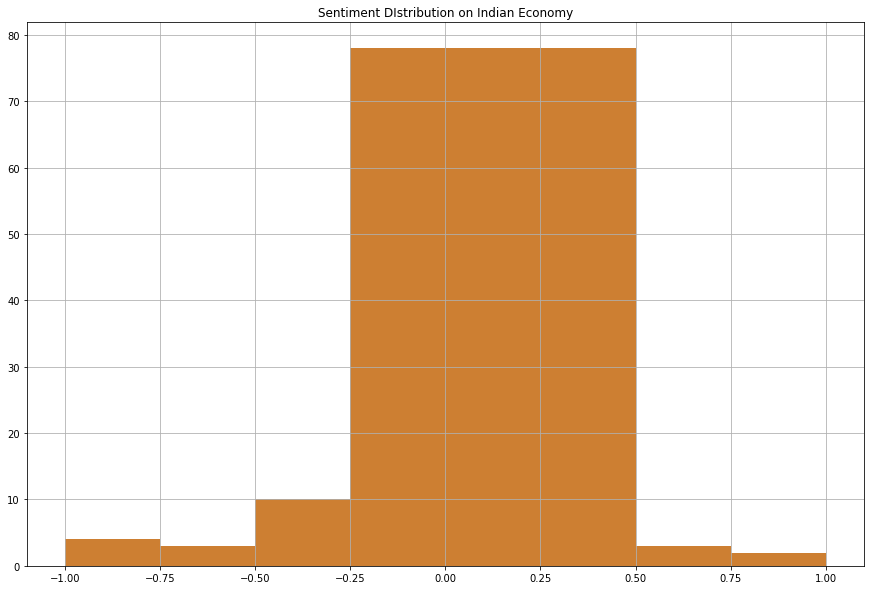

In [0]:
# Plot the sentiment of the tweets in the form of a histogram
fig, ax = plt.subplots(figsize = (15,10))
#Plot Histogram
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.5, 0.75, 1], ax=ax, color = "#CD7F32")
plt.title('Sentiment DIstribution on Indian Economy')
plt.show()